In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

Data Transfer

In [2]:
df = pd.read_csv('/content/drive/MyDrive/health-insurance.csv')
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


*Statistical Value*

In [3]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


Data Info

In [4]:
## datatype information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [5]:
## from here we know that there are no null values.

### **Exploratory Data Analysis**

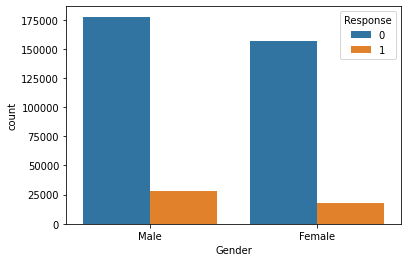

In [6]:
## categorical attributes
sns.countplot(x = 'Gender',data = df, hue = 'Response')
## so we can clearly see that there are both males and females who are intrested in an good amount, so this is useful.

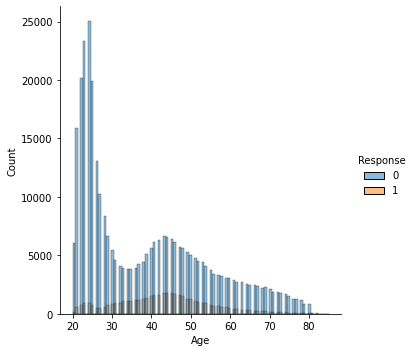

In [7]:
sns.displot(x = 'Age', data = df, hue = 'Response')
## from here we see that more who are intrested in this are around age 22-23 and 42-44.

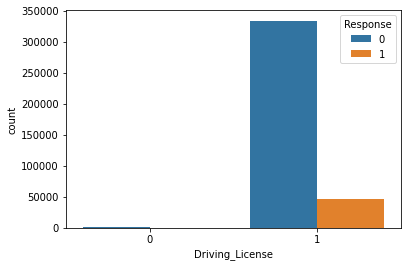

In [8]:
sns.countplot(x = 'Driving_License', data = df, hue = 'Response')
## from here we se that. there are people who does not have driving license an yet want to buy insurance.

In [9]:
## to get details of those who does not have license yet wants to buy insurance
df_ndl = df.loc[(df['Driving_License'] == 0) &  (df['Response'] == 1 )]
df_ndl.count()

id                      41
Gender                  41
Age                     41
Driving_License         41
Region_Code             41
Previously_Insured      41
Vehicle_Age             41
Vehicle_Damage          41
Annual_Premium          41
Policy_Sales_Channel    41
Vintage                 41
Response                41
dtype: int64

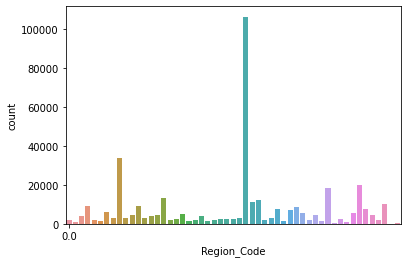

In [10]:
fig, ax = plt.subplots()
sns.countplot(x = 'Region_Code', data = df)
ax.set_xticks(range(0,1))
## here we can see that in certain regions there are people who are more intrested.

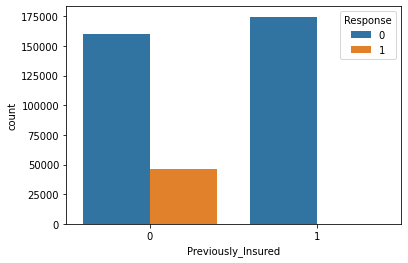

In [11]:
sns.countplot(x = 'Previously_Insured', data = df, hue = 'Response')

In [12]:
## to get details of those who are previously insured but still wants insurance
df_pi = df.loc[(df['Previously_Insured'] == 0) &  (df['Response'] == 1 )]
df_pi.count()

id                      46552
Gender                  46552
Age                     46552
Driving_License         46552
Region_Code             46552
Previously_Insured      46552
Vehicle_Age             46552
Vehicle_Damage          46552
Annual_Premium          46552
Policy_Sales_Channel    46552
Vintage                 46552
Response                46552
dtype: int64

In [13]:
## to get details of those who does not have their vehicle damaged but wants to buy insurance
df_vd = df.loc[(df['Vehicle_Damage'] == 'No') &  (df['Response'] == 1 )]
df_vd.count()

id                      982
Gender                  982
Age                     982
Driving_License         982
Region_Code             982
Previously_Insured      982
Vehicle_Age             982
Vehicle_Damage          982
Annual_Premium          982
Policy_Sales_Channel    982
Vintage                 982
Response                982
dtype: int64

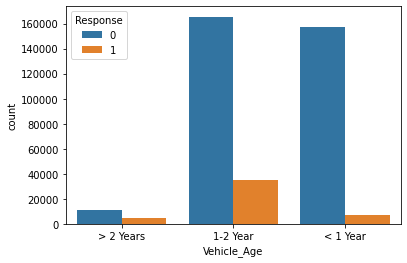

In [14]:
sns.countplot(x = 'Vehicle_Age', data = df, hue = 'Response')

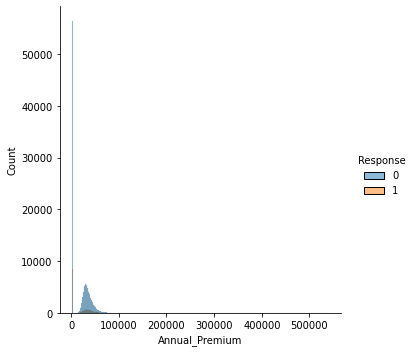

In [15]:
sns.displot(x = 'Annual_Premium', data = df, hue = 'Response')

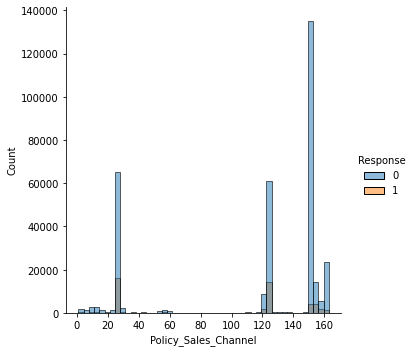

In [16]:
sns.displot(x = 'Policy_Sales_Channel', data = df, hue = 'Response')

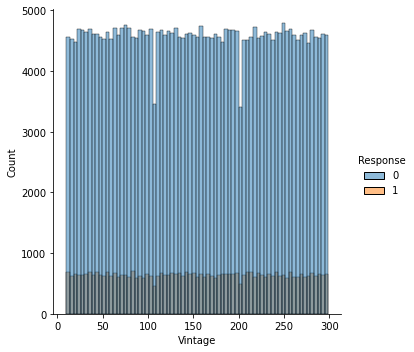

In [17]:
sns.displot(x = 'Vintage', data = df, hue = 'Response')
##so here vintage(either a customer is loyal or not) does not affect the response, so it is not useful for us.

In [18]:
## so Vintage is not useful so we will drop that column
df_1 = df.drop(columns = ['Vintage'])
df_1

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,0


In [19]:
##and also id is not useful so we will also drop that too.
df_2 = df_1.drop(columns= ['id'], axis = 1)
df_2

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,0
...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,0
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,0
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,0
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,0


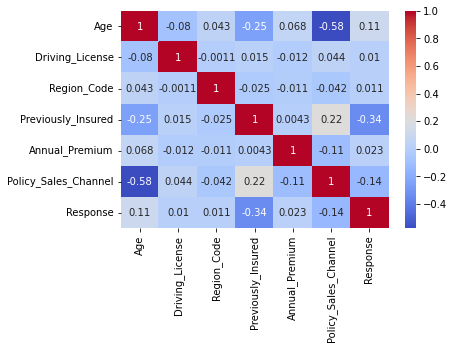

In [20]:
## now we will get the heatmap
corr = df_2.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [21]:
df_2

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,0
...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,0
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,0
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,0
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,0


In [22]:
# we will change the male by 1 and female by 0 in gender column
df_2['Gender'] = df_2['Gender'].map({'Male': 1,
                                 'Female': 0, }).astype(float)

df_2                                                       

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response
0,1.0,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,1
1,1.0,76,1,3.0,0,1-2 Year,No,33536.0,26.0,0
2,1.0,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,1
3,1.0,21,1,11.0,1,< 1 Year,No,28619.0,152.0,0
4,0.0,29,1,41.0,1,< 1 Year,No,27496.0,152.0,0
...,...,...,...,...,...,...,...,...,...,...
381104,1.0,74,1,26.0,1,1-2 Year,No,30170.0,26.0,0
381105,1.0,30,1,37.0,1,< 1 Year,No,40016.0,152.0,0
381106,1.0,21,1,30.0,1,< 1 Year,No,35118.0,160.0,0
381107,0.0,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,0


In [23]:
## we will replace yes as 1 and no as 0 in vehicle damage
df_2['Vehicle_Damage'] = df_2['Vehicle_Damage'].map({'No': 0,
                                 'Yes': 1, }).astype(float)
df_2

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response
0,1.0,44,1,28.0,0,> 2 Years,1.0,40454.0,26.0,1
1,1.0,76,1,3.0,0,1-2 Year,0.0,33536.0,26.0,0
2,1.0,47,1,28.0,0,> 2 Years,1.0,38294.0,26.0,1
3,1.0,21,1,11.0,1,< 1 Year,0.0,28619.0,152.0,0
4,0.0,29,1,41.0,1,< 1 Year,0.0,27496.0,152.0,0
...,...,...,...,...,...,...,...,...,...,...
381104,1.0,74,1,26.0,1,1-2 Year,0.0,30170.0,26.0,0
381105,1.0,30,1,37.0,1,< 1 Year,0.0,40016.0,152.0,0
381106,1.0,21,1,30.0,1,< 1 Year,0.0,35118.0,160.0,0
381107,0.0,68,1,14.0,0,> 2 Years,1.0,44617.0,124.0,0


In [24]:
## now for vehicle age i will change >2 years by 2, 1-2 years by 1, <1 year by 0
df_2['Vehicle_Age'] = df_2['Vehicle_Age'].map({'< 1 Year': 0,
                                           '1-2 Year': 1,
                                 '> 2 Years': 2, }).astype(float)
df_2

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response
0,1.0,44,1,28.0,0,2.0,1.0,40454.0,26.0,1
1,1.0,76,1,3.0,0,1.0,0.0,33536.0,26.0,0
2,1.0,47,1,28.0,0,2.0,1.0,38294.0,26.0,1
3,1.0,21,1,11.0,1,0.0,0.0,28619.0,152.0,0
4,0.0,29,1,41.0,1,0.0,0.0,27496.0,152.0,0
...,...,...,...,...,...,...,...,...,...,...
381104,1.0,74,1,26.0,1,1.0,0.0,30170.0,26.0,0
381105,1.0,30,1,37.0,1,0.0,0.0,40016.0,152.0,0
381106,1.0,21,1,30.0,1,0.0,0.0,35118.0,160.0,0
381107,0.0,68,1,14.0,0,2.0,1.0,44617.0,124.0,0


In [25]:
X = df_2
X.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response
0,1.0,44,1,28.0,0,2.0,1.0,40454.0,26.0,1
1,1.0,76,1,3.0,0,1.0,0.0,33536.0,26.0,0
2,1.0,47,1,28.0,0,2.0,1.0,38294.0,26.0,1
3,1.0,21,1,11.0,1,0.0,0.0,28619.0,152.0,0
4,0.0,29,1,41.0,1,0.0,0.0,27496.0,152.0,0


In [26]:
## i have assigned the y variable as y
y = df_2['Response']
y

0         1
1         0
2         1
3         0
4         0
         ..
381104    0
381105    0
381106    0
381107    0
381108    0
Name: Response, Length: 381109, dtype: int64

Split into train-test sets

In [27]:
from sklearn.model_selection import train_test_split, cross_val_score
# classify column
def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    model.fit(x_train, y_train)
    

# Train Models

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# fit model
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(x_test)
pred_prob2 = model2.predict_proba(x_test)

In [29]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [30]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.8324759670683146 0.680111527215649
